In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('G:\california_housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (15, 5))
no_of_items = [df[col].count() for col in df.columns]
ax.plot(no_of_items)
plt.xticks(np.arange(len(df.columns)), df.columns)
plt.show()

<Figure size 1500x500 with 1 Axes>

Thus, the 'total_bedrooms' contains missing values. Let's fill in the values by the multiple imputation chained equation(MICE) technique instead simply replacing them by mean value.

In [7]:
from impyute.imputation.cs import mice
df_continous_cols = (df.describe()).columns
df_continous = df_continous = pd.DataFrame(df[df_continous_cols], columns = df_continous_cols)
df_continous.head()
#start the MICE training
df_filled_arr = mice(df_continous.as_matrix())

c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
df_filled = pd.DataFrame(df_filled_arr, columns = df_continous_cols)
df_filled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
#Only 'ocean_proximity' is categorical data and it is filled, so let's concatenate it with the data imputed by MICE.
df = pd.concat([df_filled, df['ocean_proximity']], axis = 1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Let's do exploratory data analysis.

Plotting the longitude and latitudes, 

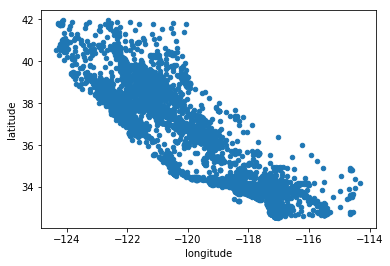

In [11]:
df[['longitude', 'latitude']].plot(x = 'longitude', y = 'latitude', kind = 'scatter')
plt.show()

Let's denote the prices too on this plot,

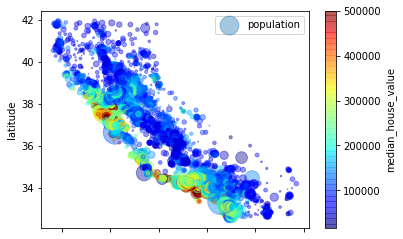

In [12]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df["population"] / 50, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
) 
plt.legend()

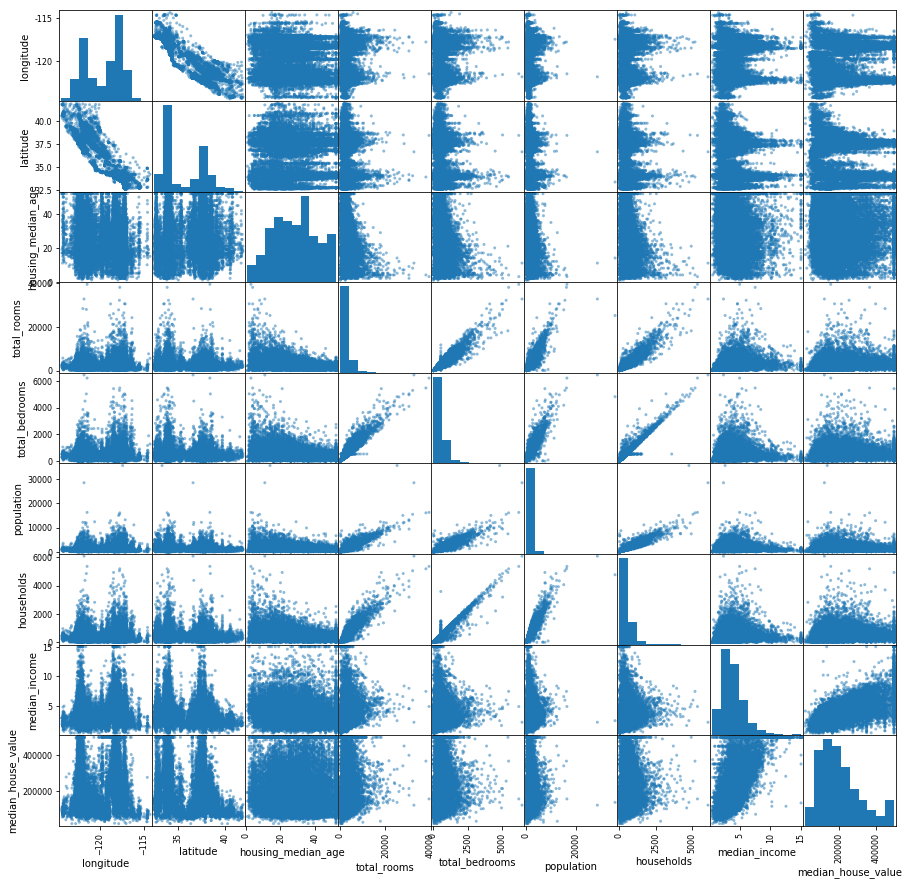

In [13]:
pd.plotting.scatter_matrix(df, figsize = (15, 15))
plt.show()

From the above data, it can be observed that 'median_income' clearly has a strong positive correlation with the 'median_house_value', similarly 'median_housing_age' seems to have a strong correlation with the 'median_house_value'.
Let's verify these observations.

In [14]:
df.corr()['median_house_value'][:-1]

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049454
population           -0.024650
households            0.065843
median_income         0.688075
Name: median_house_value, dtype: float64

Thus, the 'median_income' definitely has a strong correlation with the 'median_house_value'.

There seems to be a lot of values at the tail end of the 'median_house_value'. This might be due to discrepencies in data formation. Let's remove this data, so as to avoid problems while modelling on the data.

In [15]:
df['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
225000.0     92
350000.0     79
87500.0      78
275000.0     65
150000.0     64
175000.0     63
100000.0     62
125000.0     56
67500.0      55
250000.0     47
200000.0     46
118800.0     39
450000.0     37
156300.0     35
212500.0     33
193800.0     31
181300.0     31
300000.0     30
75000.0      30
81300.0      29
55000.0      29
93800.0      29
106300.0     28
143800.0     28
400000.0     27
           ... 
373500.0      1
433000.0      1
354600.0      1
389700.0      1
370100.0      1
304200.0      1
477200.0      1
422500.0      1
445900.0      1
309000.0      1
413100.0      1
465700.0      1
353700.0      1
438900.0      1
396700.0      1
380300.0      1
478500.0      1
455300.0      1
403000.0      1
363900.0      1
494400.0      1
389800.0      1
347500.0      1
487000.0      1
331100.0      1
303200.0      1
307900.0      1
383200.0      1
360800.0      1
405500.0      1
Name: median_house_value

In [16]:
outlier = df['median_house_value'].mode()[0]
outlier

500001.0

Thus, the value '500001.0' appears 965 times and is definitely an outlier. Let's remove all the entries having this median_house_value.

In [17]:
df_no_outs = df[df['median_house_value'] != outlier]

Let's analyze the categorical variable now, using boxplot.

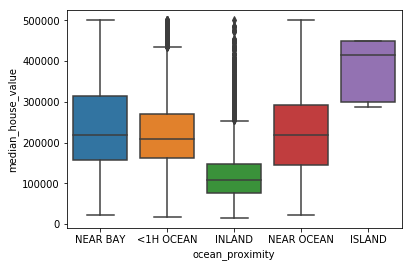

In [18]:
import seaborn as sns
sns.boxplot(x = 'ocean_proximity', y = 'median_house_value', data = df_no_outs)

From the boxplot, it can be observed that 'ocean_proximity' is a good diffrentiator for median house value for INLAND, NEAR OCEAN, and ISLAND categories as there is almost no overlap for these categories. Also for NEAR BAY and OCEAN, there is a huge overlap between the boxes and also the median value is also almost the same, so the other features will be useful to diffrentiate between them.

In [19]:
df_no_outs.shape

(19675, 10)

First, let's get the one hot encoded form of the categorical feature.

In [20]:
one_hot = pd.get_dummies(df_no_outs['ocean_proximity'])
df_new = pd.concat([df_no_outs, one_hot], axis = 1)
df_new = df_new.drop('ocean_proximity', axis = 1)
df_new.shape

(19675, 14)

In [21]:
df_new.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [22]:
df_new.shape

(19675, 14)

Let's divide the data into features and variables. 

In [23]:
X = df_new.drop('median_house_value', axis = 1)
y = df_new['median_house_value']
X.shape

(19675, 13)

In [24]:
"""X_continous = X[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler1.fit(X_continous)
scaler2.fit(y.values.reshape(-1, 1))
X_continous_scaled = scaler1.transform(X_continous)
y_continous_scaled = scaler2.transform(y.values.reshape(-1, 1))
X_continous_scaled_df = pd.DataFrame(X_continous_scaled, columns = X_continous.columns)
y_continous_scaled_df = pd.DataFrame(y_continous_scaled, columns = ['median_house_value'])"""

"X_continous = X[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]\nfrom sklearn.preprocessing import StandardScaler\nscaler1 = StandardScaler()\nscaler2 = StandardScaler()\nscaler1.fit(X_continous)\nscaler2.fit(y.values.reshape(-1, 1))\nX_continous_scaled = scaler1.transform(X_continous)\ny_continous_scaled = scaler2.transform(y.values.reshape(-1, 1))\nX_continous_scaled_df = pd.DataFrame(X_continous_scaled, columns = X_continous.columns)\ny_continous_scaled_df = pd.DataFrame(y_continous_scaled, columns = ['median_house_value'])"

In [28]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler1.fit(X)
scaler2.fit(y.values.reshape(-1, 1))
X_scaled = scaler1.transform(X)
y_scaled = scaler2.transform(y.values.reshape(-1, 1))
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
y_scaled_df = pd.DataFrame(y_scaled, columns = ['median_house_value'])

c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  


Now that we have a clean dataset, let's divide it into train and test set.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_scaled_df, test_size = 0.1, random_state = 1)
print("X_train shape is: {}".format(X_train.shape))
print("X_test shape is: {}".format(X_test.shape))
print("y_train shape is: {}".format(y_train.shape))
print("y_test shape is: {}".format(y_test.shape))

X_train shape is: (17707, 13)
X_test shape is: (1968, 13)
y_train shape is: (17707, 1)
y_test shape is: (1968, 1)


Let's start the modelling,

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
reg_svm = svm.SVR()
param_C = [0.01, 0.1, 1, 10, 100]
param_gamma = [0.01, 0.1, 1, 10, 100]
params_grid = {'kernel': ['rbf'], 'C': param_C, 'gamma': param_gamma}
reg_svr_grid = GridSearchCV(reg_svm, params_grid, cv = 3, scoring = 'neg_mean_absolute_error')
reg_svr_grid.fit(X_train, y_train)

c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataC

c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataC

c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:761: DataC

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.01, 0.1, 1, 10, 100], 'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [31]:
best_estimator = reg_svr_grid.best_estimator_

In [33]:
best_estimator

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
from sklearn.metrics import mean_squared_error
y_test_preds = best_estimator.predict(X_test)
mean_squared_error(y_test, y_test_preds)

0.23475891888359232

Thus, the SVR has quite low mean square error. Thus the best_estimator is a very good approximator of median_household_values.